<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/data_ev_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('https://raw.githubusercontent.com/dietadestina/AI4Jobs_program/refs/heads/main/ev_cat_01-24.csv')

In [385]:
data

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,01/12/19,0,0,0,41,18,57,49,0,10,0,197,15,1,14412,1900,333
280,01/12/20,0,0,0,10,1,505,18,0,0,0,124,17,1,10230,4564,384
281,01/12/21,2,0,1,218,16,2483,133,0,2,0,124,17,0,24115,26150,494
282,01/12/22,0,0,0,146,30,2925,915,0,15,0,673,35,0,35604,64525,138


In [386]:
data.isna().sum()

,0
Date,0
FOUR WHEELER (INVALID CARRIAGE),0
HEAVY GOODS VEHICLE,0
HEAVY MOTOR VEHICLE,0
HEAVY PASSENGER VEHICLE,0
LIGHT GOODS VEHICLE,0
LIGHT MOTOR VEHICLE,0
LIGHT PASSENGER VEHICLE,0
MEDIUM GOODS VEHICLE,0
MEDIUM PASSENGER VEHICLE,0


In [387]:
data.duplicated().sum()

0

In [388]:
data.describe()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.341549,2.161972,0.514085,28.630282,44.806338,634.964789,80.306338,0.109155,2.732394,0.172535,26.721831,5.274648,0.443662,6805.221831,8129.883803,47.390845
std,1.223835,12.048276,1.024339,78.967099,132.064637,1671.032572,237.610605,0.410189,10.343169,1.233436,67.552702,11.173634,2.069549,13702.076927,21513.610306,129.932731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,96.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.250000,28.250000,86.250000,24.000000,0.000000,0.000000,0.000000,18.250000,3.000000,0.000000,7582.750000,1411.250000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


In [389]:

data = data[data['Date'] != '0']
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-389-2e86f4db8618>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-389-2e86f4db8618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


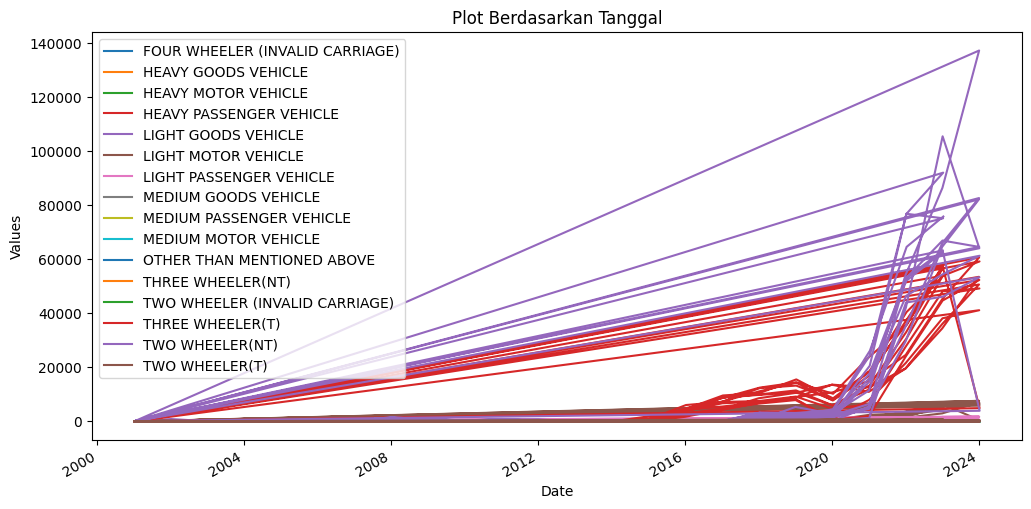

In [390]:
data.set_index('Date', inplace=True)

data.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Plot Berdasarkan Tanggal")
plt.show()

In [391]:
annual_data = data.resample('Y').sum()
annual_data.reset_index(inplace=True)
annual_data['Year'] = annual_data['Date'].dt.year
annual_data.drop(columns=['Date'], inplace=True)

features = annual_data.drop(columns=['Year']).values

<ipython-input-391-027852a13a69>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_data = data.resample('Y').sum()


In [392]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [393]:
n_input = 10
generator = TimeseriesGenerator(scaled_features, scaled_features, length=n_input, batch_size=1)

In [394]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, scaled_features.shape[1])))
model.add(Dense(scaled_features.shape[1]))  # Output sesuai dengan jumlah kolom fitur
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 100)                 │          46,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │           1,616 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,416 (189.12 KB)

 Trainable params: 48,416 (189.12 KB)

 Non-trainable params: 0 (0.00 B)

In [395]:
model.fit(generator, epochs=50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1810
Epoch 2/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0028

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0586
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0348
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0304
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0222
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0305
Epoch 16/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147
Epoch 17/50
14/14 ━━━━

In [396]:
# Melakukan prediksi
predictions = model.predict(generator)

# Mengembalikan skala
predicted_values = scaler.inverse_transform(predictions)

# Membuat DataFrame hasil prediksi
predictions_df = pd.DataFrame(predicted_values, columns=annual_data.columns[1:])  # Mengambil nama kolom fitur
predictions_df['Year'] = annual_data['Year'][n_input:].values  # Mengambil tahun yang sesuai

print(predictions_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
    HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
0              0.542629            10.273429                 6.408977   
1              0.488797             7.219227                 7.486337   
2              0.764035            18.912224                 3.061708   
3              0.468949            14.599121                 3.442510   
4              0.263396            10.309046                 3.721916   
5              0.295650            12.270428                 2.566370   
6              0.637511            11.549113                 1.582472   
7             -1.357580           -10.688267                 1.703437   
8             -0.829215             1.336007                 0.476999   
9              0.712560           -11.238775                 0.418393   
10             4.062554            -0.810135                 2.047496   
11            11.672594            11.276057                 4.682775   
12        

In [397]:
y_pred_scaled = model.predict(X_test_scaled)

y_pred = scaler.inverse_transform(y_pred_scaled)

years = annual_data['Year'].values[test_data_size + n_input - 1:]  # Ambil tahun yang sesuai
predictions = pd.DataFrame(true_predictions, columns=annual_data.columns[1:])  # Ambil nama kolom fitur
predictions['Year'] = years

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


NameError: name 'test_data_size' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mengambil data untuk pengujian
test_data_size = len(scaled_features) - n_input  # Ukuran data pengujian
test_features = scaled_features[test_data_size:]  # Mengambil fitur untuk pengujian

# Menggunakan generator untuk data pengujian
test_generator = TimeseriesGenerator(test_features, test_features, length=n_input, batch_size=1)

# Melakukan prediksi pada data pengujian
test_predictions = model.predict(test_generator)

# Mengembalikan skala ke data asli
true_predictions = scaler.inverse_transform(test_predictions)

# Membuat DataFrame untuk menyimpan hasil prediksi
test_df = annual_data.iloc[test_data_size + n_input - 1:].copy()  # Ambil tahun yang sesuai
test_df['Predictions'] = true_predictions

# Memplot hasil
plt.figure(figsize=(14, 5))
plt.plot(test_df['Year'], test_df.drop(columns=['Predictions']).values, label='True Values', marker='o')
plt.plot(test_df['Year'], test_df['Predictions'], label='Predictions', marker='x')
plt.title('EV Sales Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# Menghitung RMSE
rmse = sqrt(mean_squared_error(test_df.drop(columns=['Predictions']).values, true_predictions))
print(f'RMSE: {rmse}')

In [ ]:
from google.colab import files

ev_cat.to_csv('ev_cat.csv', index=False)
#files.download('ev_cat.csv')